### **Question 1**
**1. Explain the resource advantage of superdense coding?**

- The superdense coding protocol provides a quantum advantage by doubling the classical information capacity of a qubit. By utilizing a pre-shared entangled resource (a Bell pair), Alice can transmit two classical bits of information to Bob by physically sending only one qubit. In classical physics, sending a single two-state particle could strictly convey only one bit of information.

**2. How many qubits are physically transmitted from Alice to Bob?**

- One qubit. Alice operates on her half of the entangled pair and sends only that single specific qubit through the channel to Bob.

**3. How many classical bits are successfully communicated upon measurement?**

- Two classical bits. Upon performing a Bell measurement (CNOT followed by Hadamard) on the pair, Bob successfully reconstructs the specific two-bit message ($00, 01, 10,$ or $11$) Alice intended to send.


In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

def superdense_coding_protocol(message):
    # 1. Setup Circuit
    qc = QuantumCircuit(2, 2)
    
    # 2. Bell Pair
    qc.h(0)
    qc.cx(0, 1)
    
    # 3. Alice's Encoding
    if message == '00':
        pass
    elif message == '01':
        qc.z(0)
    elif message == '10':
        qc.x(0)
    elif message == '11':
        qc.z(0)
        qc.x(0) 
        
    # 4. Bob's Decoding
    qc.cx(0, 1)
    qc.h(0)
    
    # 5. Measure
    qc.measure([0, 1], [0, 1])
    
    # Execute
    backend = AerSimulator()
    qc_compiled = transpile(qc, backend)
    job = backend.run(qc_compiled, shots=1)
    result = job.result().get_counts()
    
    return list(result.keys())[0]

inputs = ["00", "01", "10", "11"]

print(f"{'Input':<10} | {'Received':<10} | {'Status'}")
print("-" * 35)

for msg in inputs:
    received = superdense_coding_protocol(msg)
    status = "PASS" if msg == received else "FAIL"
    print(f"{msg:<10} | {received:<10} | {status}")

Input      | Received   | Status
-----------------------------------
00         | 00         | PASS
01         | 01         | PASS
10         | 10         | PASS
11         | 11         | PASS


### **Proof & Analysis**

In [39]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np

def step_by_step_proof():
    print("   SUPERDENSE CODING: COMPUTATIONAL PROOF (Message '11')")
    
    # --- STEP 1: INITIALIZATION ---
    qc = QuantumCircuit(2)
    state = Statevector(qc)
    print("STEP 1: INITIAL STATE")
    print("---------------------")
    print("Math: We start with two independent qubits in state |0>.")
    print(f"Current State: {state.draw('text')}\n")

    # --- STEP 2: ENTANGLEMENT (Bell Pair) ---
    qc.h(0)     # Hadamard on Alice's qubit
    qc.cx(0, 1) # CNOT (0 controls 1)
    state = state.evolve(qc)
    
    print("STEP 2: CREATING ENTANGLEMENT (The Bell Pair)")
    print("---------------------------------------------")
    print("Action: Alice applies H, then CNOT(0,1).")
    print("Math:   This creates the superposition (|00> + |11>) / sqrt(2).")
    print(f"Current State: {state.draw('text')}\n")

    # --- STEP 3: ALICE ENCODES '11' ---
    # Sub-step 3a: Apply Z (Phase Flip)
    qc = QuantumCircuit(2)
    qc.z(0)
    state = state.evolve(qc)
    
    print("STEP 3a: ALICE APPLIES Z-GATE (Phase Flip)")
    print("------------------------------------------")
    print("Action: Alice applies Z to qubit 0.")
    print("Math:   The sign of the |1> term flips. State becomes (|00> - |11>) / sqrt(2).")
    print(f"Current State: {state.draw('text')}\n")

    # Sub-step 3b: Apply X (Bit Flip)
    qc = QuantumCircuit(2)
    qc.x(0)
    state = state.evolve(qc)

    print("STEP 3b: ALICE APPLIES X-GATE (Bit Flip)")
    print("----------------------------------------")
    print("Action: Alice applies X to qubit 0.")
    print("Math:   0 becomes 1, and 1 becomes 0.")
    print("        |00> -> |10>  and  |11> -> |01>")
    print("        Resulting State: (|10> - |01>) / sqrt(2)")
    print(f"Current State: {state.draw('text')}\n")

    # --- STEP 4: BOB DECODES ---
    # Sub-step 4a: Un-entangle with CNOT
    qc = QuantumCircuit(2)
    qc.cx(0, 1)
    state = state.evolve(qc)
    
    print("STEP 4a: BOB APPLIES CNOT (Un-entangle)")
    print("---------------------------------------")
    print("Action: Bob applies CNOT (0 controls 1).")
    print("Math:   |10> becomes |11> (target flips because control is 1).")
    print("        |01> stays   |01> (target stays because control is 0).")
    print("        State is now simplified: (|11> - |01>) / sqrt(2)")
    print("        Factorized: |-1> (on q0) (x) |1> (on q1)")
    print(f"Current State: {state.draw('text')}\n")

    # Sub-step 4b: Restore Basis with Hadamard
    qc = QuantumCircuit(2)
    qc.h(0)
    state = state.evolve(qc)
    
    print("STEP 4b: BOB APPLIES HADAMARD (Final Step)")
    print("------------------------------------------")
    print("Action: Bob applies H to qubit 0.")
    print("Math:   H transforms the state |-> back into |1>.")
    print("        The system collapses to the pure classical state |11>.")
    print(f"FINAL QUANTUM STATE: {state.draw('text')}\n")

    print("=========================================================")
    print("CONCLUSION: The final state is strictly |11>.")
    print("            Measurement will yield '11' with 100% probability.")
    print("=========================================================")

if __name__ == "__main__":
    step_by_step_proof()

   SUPERDENSE CODING: COMPUTATIONAL PROOF (Message '11')
STEP 1: INITIAL STATE
---------------------
Math: We start with two independent qubits in state |0>.
Current State: [1.+0.j,0.+0.j,0.+0.j,0.+0.j]

STEP 2: CREATING ENTANGLEMENT (The Bell Pair)
---------------------------------------------
Action: Alice applies H, then CNOT(0,1).
Math:   This creates the superposition (|00> + |11>) / sqrt(2).
Current State: [0.70710678+0.j,0.        +0.j,0.        +0.j,0.70710678+0.j]

STEP 3a: ALICE APPLIES Z-GATE (Phase Flip)
------------------------------------------
Action: Alice applies Z to qubit 0.
Math:   The sign of the |1> term flips. State becomes (|00> - |11>) / sqrt(2).
Current State: [ 0.70710678+0.j, 0.        +0.j, 0.        +0.j,-0.70710678+0.j]

STEP 3b: ALICE APPLIES X-GATE (Bit Flip)
----------------------------------------
Action: Alice applies X to qubit 0.
Math:   0 becomes 1, and 1 becomes 0.
        |00> -> |10>  and  |11> -> |01>
        Resulting State: (|10> - |01>) / s

### **Visualization**

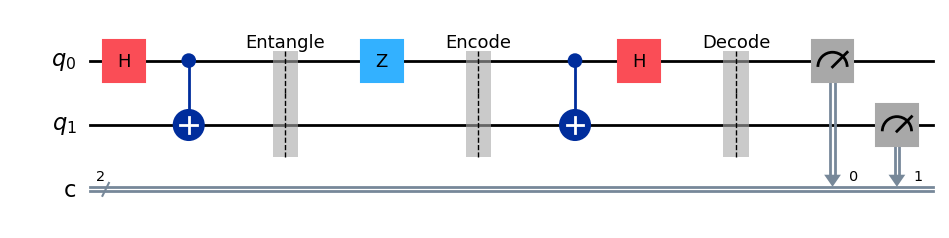

In [37]:
from qiskit import QuantumCircuit
import matplotlib.pyplot as plt

def draw_superdense_circuit(message):
    # 1. Setup Circuit
    qc = QuantumCircuit(2, 2)
    
    # 2. Bell Pair (Entanglement)
    qc.h(0)
    qc.cx(0, 1)
    qc.barrier(label="Entangle") 
    
    # 3. Alice's Encoding
    if message == '00':
        qc.id(0) 
    elif message == '01':
        qc.z(0)
    elif message == '10':
        qc.x(0)
    elif message == '11':
        qc.z(0)
        qc.x(0) 
        
    qc.barrier(label="Encode") 
        
    # 4. Bob's Decoding
    qc.cx(0, 1)
    qc.h(0)
    qc.barrier(label="Decode") 
    
    # 5. Measure
    qc.measure([0, 1], [0, 1])
    
    return qc

message = '01'
qc = draw_superdense_circuit(message)
qc.draw(output='mpl', style='iqp', filename='superdense_circuit.png')

### **Question 2**

- Diffie-Hellman (DH) is a protocol that allows two parties to securely establish a shared secret key over an insecure channel. This key is used to encrypt subsequent communications.
- It uses modular arithmetic with a large prime $p$ and a generator $g$.Public: $p, g$, and computed values $A = g^a \pmod p$ and $B = g^b \pmod p$.Private: Random integers $a$ (Alice) and $b$ (Bob).Shared Secret: Both parties derive the same key $S = g^{ab} \pmod p$.
- Security relies on the Discrete Logarithm Problem. While calculating $A = g^a \pmod p$ is computationally easy, reversing it to find the private key $a$ from $A, g,$ and $p$ is computationally infeasible for large primes.
- Standard DH lacks authentication, making it vulnerable to Man-in-the-Middle (MitM) attacks where an attacker intercepts keys to impersonate both parties.

In [40]:
def diffie_hellman_simulation():
    print("--- Diffie-Hellman Key Exchange Simulation ---\n")
    
    # 1. Agree on public parameters
    p = 23  # Prime number
    g = 5   # Generator
    print(f"Public Parameters: Prime (p)={p}, Generator (g)={g}")
    
    # 2. Assign Private Keys (Secret)
    a = 6   # Alice's private key
    b = 15  # Bob's private key
    print(f"Alice's Private Key (a): {a}")
    print(f"Bob's Private Key (b):   {b}")
    
    # 3. Calculate Public Keys
    # Alice computes A = g^a mod p
    alice_public = (g ** a) % p
    
    # Bob computes B = g^b mod p
    bob_public = (g ** b) % p
    
    print(f"\nCalculated Public Keys:")
    print(f"Alice's Public Key (A) = {g}^{a} mod {p} = {alice_public}")
    print(f"Bob's Public Key (B)   = {g}^{b} mod {p} = {bob_public}")
    
    # 4. Compute Shared Secret
    # Alice computes Sa = B^a mod p (using Bob's public key)
    shared_secret_alice = (bob_public ** a) % p
    
    # Bob computes Sb = A^b mod p (using Alice's public key)
    shared_secret_bob = (alice_public ** b) % p
    
    print(f"\nComputing Shared Secrets:")
    print(f"Alice calculates: {bob_public}^{a} mod {p} = {shared_secret_alice}")
    print(f"Bob calculates:   {alice_public}^{b} mod {p} = {shared_secret_bob}")
    
    # 5. Programmatic Assertion
    try:
        assert shared_secret_alice == shared_secret_bob
        print(f"\n✅ SUCCESS: Shared secrets match! Key = {shared_secret_alice}")
    except AssertionError:
        print(f"\n❌ ERROR: Shared secrets do not match.")

if __name__ == "__main__":
    diffie_hellman_simulation()

--- Diffie-Hellman Key Exchange Simulation ---

Public Parameters: Prime (p)=23, Generator (g)=5
Alice's Private Key (a): 6
Bob's Private Key (b):   15

Calculated Public Keys:
Alice's Public Key (A) = 5^6 mod 23 = 8
Bob's Public Key (B)   = 5^15 mod 23 = 19

Computing Shared Secrets:
Alice calculates: 19^6 mod 23 = 2
Bob calculates:   8^15 mod 23 = 2

✅ SUCCESS: Shared secrets match! Key = 2


### **Proof & Analysis**

In [41]:
def proof_diffie_hellman_math():
    print("--- COMPUTATIONAL PROOF: Diffie-Hellman (p=23, g=5) ---\n")
    
    # Constants
    p = 23
    g = 5
    a = 6
    b = 15

    # STEP 1: VERIFY ALICE'S PUBLIC KEY (A)
    # Math: A = 5^6 mod 23
    print("STEP 1: Alice's Public Key (A)")
    print(f"   Formula: {g}^{a} mod {p}")
    val_a_full = g ** a
    val_a_mod = val_a_full % p
    print(f"   Intermediate: {g}^{a} = {val_a_full}")
    print(f"   Modulo:       {val_a_full} / {p} = {val_a_full // p} remainder {val_a_mod}")
    print(f"   Result (A):   {val_a_mod}\n")

    # STEP 2: VERIFY BOB'S PUBLIC KEY (B)
    # Math: B = 5^15 mod 23
    print("STEP 2: Bob's Public Key (B)")
    print(f"   Formula: {g}^{b} mod {p}")
    val_b_full = g ** b
    val_b_mod = val_b_full % p
    print(f"   Intermediate: {g}^{b} = {val_b_full}")
    print(f"   Modulo:       {val_b_full} / {p} = {val_b_full // p} remainder {val_b_mod}")
    print(f"   Result (B):   {val_b_mod}\n")

    # STEP 3: VERIFY SHARED SECRET (S)
    print("STEP 3: Verify Shared Secret (S)")
    
    # Alice's Calculation: S = B^a mod p
    # We use the B we just calculated (19)
    B = val_b_mod
    print(f"   Alice computes: {B}^{a} mod {p}")
    val_sa_full = B ** a
    val_sa_mod = val_sa_full % p
    print(f"   Intermediate:   {B}^{a} = {val_sa_full}")
    print(f"   Modulo:         {val_sa_full} % {p} = {val_sa_mod}")
    print(f"   Alice's Secret: {val_sa_mod}")

    # Bob's Calculation: S = A^b mod p
    # We use the A we just calculated (8)
    A = val_a_mod
    print(f"\n   Bob computes:   {A}^{b} mod {p}")
    val_sb_full = A ** b
    val_sb_mod = val_sb_full % p
    print(f"   Intermediate:   {A}^{b} = {val_sb_full}")
    print(f"   Modulo:         {val_sb_full} % {p} = {val_sb_mod}")
    print(f"   Bob's Secret:   {val_sb_mod}\n")

    # CONCLUSION
    if val_sa_mod == val_sb_mod == 2:
        print("CONCLUSION: Mathematical verification SUCCESS. Both derived 2.")
    else:
        print("CONCLUSION: Verification FAILED.")

if __name__ == "__main__":
    proof_diffie_hellman_math()

--- COMPUTATIONAL PROOF: Diffie-Hellman (p=23, g=5) ---

STEP 1: Alice's Public Key (A)
   Formula: 5^6 mod 23
   Intermediate: 5^6 = 15625
   Modulo:       15625 / 23 = 679 remainder 8
   Result (A):   8

STEP 2: Bob's Public Key (B)
   Formula: 5^15 mod 23
   Intermediate: 5^15 = 30517578125
   Modulo:       30517578125 / 23 = 1326851222 remainder 19
   Result (B):   19

STEP 3: Verify Shared Secret (S)
   Alice computes: 19^6 mod 23
   Intermediate:   19^6 = 47045881
   Modulo:         47045881 % 23 = 2
   Alice's Secret: 2

   Bob computes:   8^15 mod 23
   Intermediate:   8^15 = 35184372088832
   Modulo:         35184372088832 % 23 = 2
   Bob's Secret:   2

CONCLUSION: Mathematical verification SUCCESS. Both derived 2.


### **Visualization**

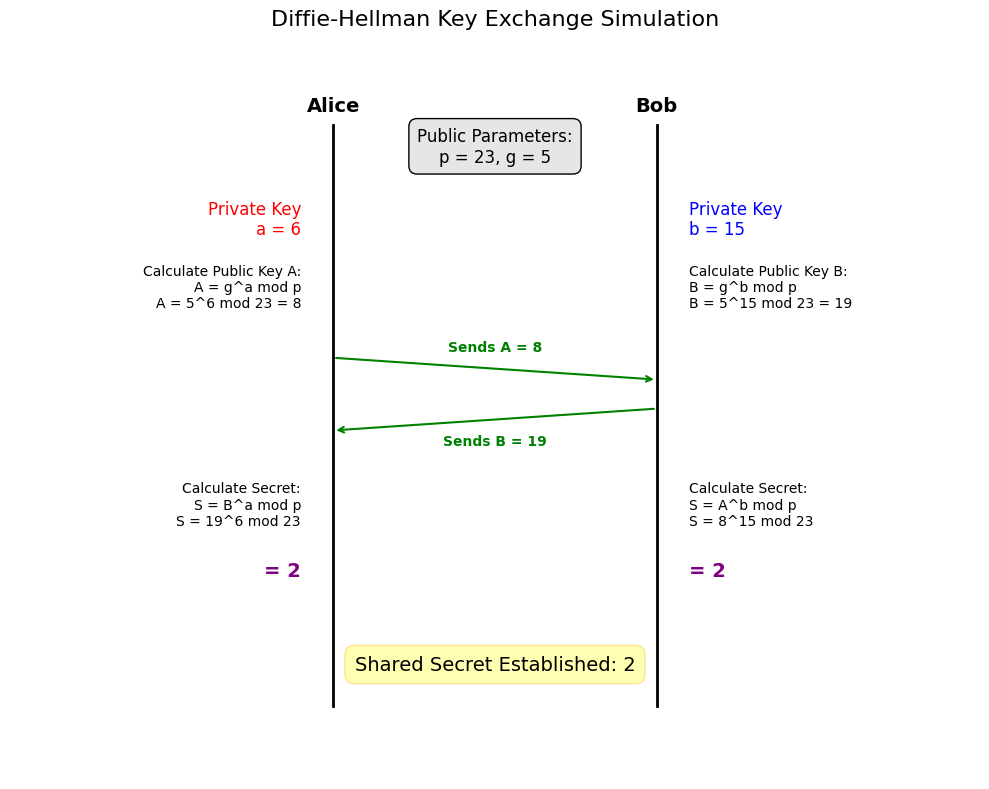

In [43]:
import matplotlib.pyplot as plt

def draw_dh_sequence():
    # Create the figure
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Set limits and hide axes (canvas setup)
    ax.set_xlim(0, 3)
    ax.set_ylim(0, 10)
    ax.axis('off')
    
    # Draw vertical timelines for Alice and Bob
    ax.plot([1, 1], [1, 9], 'k-', lw=2)  # Alice's timeline
    ax.plot([2, 2], [1, 9], 'k-', lw=2)  # Bob's timeline
    
    # Add Headers
    ax.text(1, 9.2, "Alice", ha='center', fontsize=14, fontweight='bold')
    ax.text(2, 9.2, "Bob", ha='center', fontsize=14, fontweight='bold')
    
    # Step 1: Public Parameters
    ax.text(1.5, 8.5, "Public Parameters:\np = 23, g = 5", ha='center', fontsize=12, 
            bbox=dict(facecolor='#e6e6e6', edgecolor='black', boxstyle='round,pad=0.5'))
    
    # Step 2: Private Keys
    ax.text(0.9, 7.5, "Private Key\na = 6", ha='right', fontsize=12, color='red')
    ax.text(2.1, 7.5, "Private Key\nb = 15", ha='left', fontsize=12, color='blue')
    
    # Step 3: Calculate Public Keys
    ax.text(0.9, 6.5, "Calculate Public Key A:\nA = g^a mod p\nA = 5^6 mod 23 = 8", ha='right', fontsize=10)
    ax.text(2.1, 6.5, "Calculate Public Key B:\nB = g^b mod p\nB = 5^15 mod 23 = 19", ha='left', fontsize=10)
    
    # Step 4: Exchange Public Keys (Arrows)
    # Alice sends A to Bob
    ax.annotate("", xy=(2, 5.5), xytext=(1, 5.8), arrowprops=dict(arrowstyle="->", color='green', lw=1.5))
    ax.text(1.5, 5.9, "Sends A = 8", ha='center', fontsize=10, color='green', fontweight='bold')
    
    # Bob sends B to Alice
    ax.annotate("", xy=(1, 4.8), xytext=(2, 5.1), arrowprops=dict(arrowstyle="->", color='green', lw=1.5))
    ax.text(1.5, 4.6, "Sends B = 19", ha='center', fontsize=10, color='green', fontweight='bold')
    
    # Step 5: Compute Shared Secret
    ax.text(0.9, 3.5, "Calculate Secret:\nS = B^a mod p\nS = 19^6 mod 23", ha='right', fontsize=10)
    ax.text(0.9, 2.8, "= 2", ha='right', fontsize=14, fontweight='bold', color='purple')
    
    ax.text(2.1, 3.5, "Calculate Secret:\nS = A^b mod p\nS = 8^15 mod 23", ha='left', fontsize=10)
    ax.text(2.1, 2.8, "= 2", ha='left', fontsize=14, fontweight='bold', color='purple')
    
    # Step 6: Final Result
    ax.text(1.5, 1.5, "Shared Secret Established: 2", ha='center', fontsize=14, 
            bbox=dict(facecolor='yellow', alpha=0.3, edgecolor='orange', boxstyle='round,pad=0.5'))
    
    plt.title("Diffie-Hellman Key Exchange Simulation", fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()

# Run the function
draw_dh_sequence()